
# Principal Component Analysis

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Using PCA in 2-D (?) to understand its concept.

Imagine a dataset with the following composition:

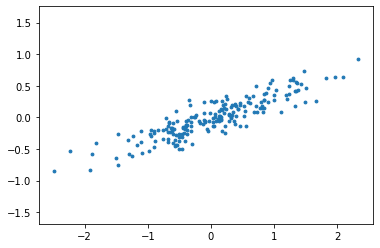

In [21]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha=1, s=8)
plt.axis('equal');

This dataset is comprised of two dimensions. The first column is the X[:, 0] (which, in the graph, is represented by the x-axis) and the second column, X[:, 1] (which, in the graph, is represented by the y-axis).

If we think about the information contained in this data, we could imagine that the axis where the information is <b>really</b> contained is neighter x nor the y axis. It is, rather, an axis somewhere in between.

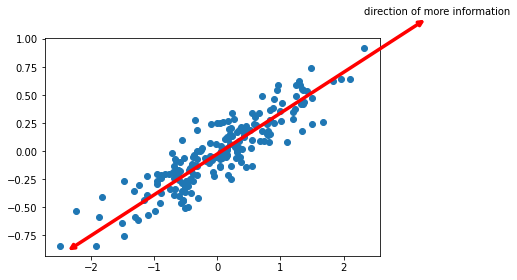

In [22]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=1)
plt.annotate('direction of more information', xy=(min(X[:,0])+0.1, min(X[:,1])-.05), xytext=(max(X[:,0]), max(X[:,1])+0.3), arrowprops=dict(arrowstyle= '<->', color='red', lw=3.5, ls='-'));

Specifically, it seems to be a combination of both the first and second dimensions. Indeed, it is. 

The PCA algorithm will try to find the directions in which the most information is contained. By information, we always mean to say - variance.

Rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between your features (your `X`).

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.

In [23]:
X.shape

(200, 2)

In [24]:
pd.DataFrame(X)

,0,1
0,-0.625302,-0.170064
1,0.960695,0.590901
2,-0.598543,-0.402593
3,-2.228059,-0.532577
4,-0.461430,-0.498867
...,...,...
195,0.838409,0.278380
196,0.312708,-0.010600
197,1.955876,0.638224
198,-1.108304,-0.395054


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The <b>fit method</b> learns some quantities from the data, most importantly the "components" and "explained variance":

In [26]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [27]:
pca.components_.shape

(2, 2)

In [28]:
pca.components_[0]

array([-0.94446029, -0.32862557])

In [29]:
pca.components_[1]

array([-0.32862557,  0.94446029])

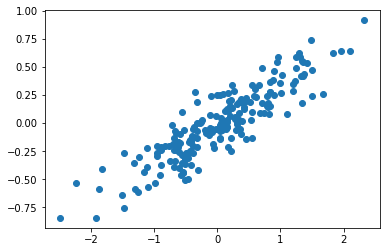

In [30]:
plt.scatter(X[:, 0], X[:, 1])

In [31]:
pd.DataFrame(X)

,0,1
0,-0.625302,-0.170064
1,0.960695,0.590901
2,-0.598543,-0.402593
3,-2.228059,-0.532577
4,-0.461430,-0.498867
...,...,...
195,0.838409,0.278380
196,0.312708,-0.010600
197,1.955876,0.638224
198,-1.108304,-0.395054


What do these components mean?

The first component is `pca.components_[0]`

In [32]:
pca.components_[0]

array([-0.94446029, -0.32862557])

In [33]:
new_x = (-0.625302*-0.94446029)+(-0.170064*-0.32862557)
new_y = (-0.625302*-0.32862557)+(-0.170064*0.94446029)

In [34]:
print(new_x,new_y)

0.64646028719406 0.044871531413579996


The first component of a PCA method is always the component that contains the most information. What this component is doing is taking what is called as `a linear combination of the original columns`. In this case, the results show that the PCA decided to take $-0.94$ of the first column (`X[:,0]`) and $-0.32$ of the second dimension (`X[:, 1]`). Let's take a look at the second component `pca.components_[1]`

In [35]:
pca.components_[1]

array([-0.32862557,  0.94446029])

This is telling us that the second component of our data (the second most important combination of features) is comprised by taking the first dimension and multiplying it by $-0.32$ and taking the second dimension and multiplying it by $0.94$.

### Explained Variance

Another important aspect of the results is the `explained_variance`. It can be obtained by the `pca.explained_variance` attibute.

In [36]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [37]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


In [38]:
pca.components_[0]

array([-0.94446029, -0.32862557])

For this case, we observe that only 1 component explains ~97% of the variance (information) in our data. It means that you can reduce the number of dimensions to 1, and it will still retain ~97% of its signal.

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]


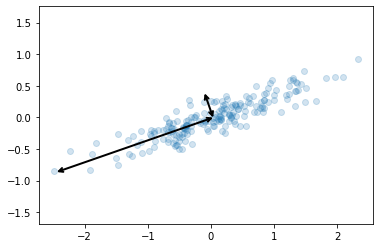

In [39]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='<->', color='k',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    print(v0, v1)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

In [40]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [41]:
pca.transform(X)

array([[ 6.76769235e-01,  5.97386015e-02],
       [-1.07121393e+00,  2.57240064e-01],
       [ 7.27912364e-01, -1.68669939e-01],
       [ 2.30964136e+00,  2.44066575e-01],
       [ 6.30052323e-01, -3.04655713e-01],
       [ 1.02448887e+00,  7.56230140e-02],
       [ 7.77183507e-01, -8.34608477e-02],
       [-1.39656414e+00,  1.44518385e-01],
       [-2.91049874e-01, -2.01289478e-01],
       [ 1.88864221e+00,  2.31419563e-01],
       [-7.11544293e-01,  1.13426118e-01],
       [ 6.38884130e-01,  3.88212853e-02],
       [ 5.48059617e-01, -2.00775267e-01],
       [-2.19312436e-01,  2.08243673e-01],
       [-3.87789490e-01,  6.89135848e-02],
       [ 7.15219956e-01,  1.13841003e-01],
       [-1.08373816e+00,  7.78081042e-02],
       [-2.99917403e-01, -5.86382919e-02],
       [-7.96849021e-01,  2.44527383e-01],
       [-8.12568346e-01, -1.17341246e-01],
       [-1.54018281e+00, -3.24862050e-02],
       [-2.52920476e-01, -4.86012463e-02],
       [ 6.26464454e-01, -1.68045678e-01],
       [-1.

In [42]:
pc1 = pca.transform(X)[:,0]
pc2 = pca.transform(X)[:,1]

[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]
[0 0] [ 2.61969149e+00 -1.60409840e-16]
[0 0] [4.99411294e-17 4.07800269e-01]


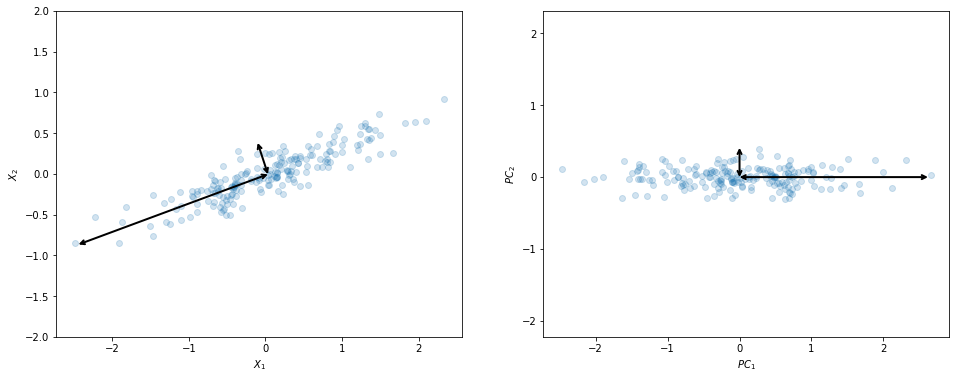

In [43]:
# plot data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax1)
ax1.set_ylim([-2,2])


ax2.scatter(pc1, pc2, alpha=0.2, )
count = 0
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    count += np.pi/2
    draw_vector(np.array([0, 0]) , np.array([np.sin(count) * np.sqrt(length) * 3, -np.cos(count) * np.sqrt(length) * 3]) , ax=ax2)
    
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')

ax2.set_xlabel('$PC_1$')
ax2.set_ylabel('$PC_2$')
plt.axis('equal');

In [44]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [45]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

So what the PCA has done was effectively rotate the original features into a new dimension that was more suitable. Now, you have at the x-axis a variable that contains most of the information, and at the y-axis a variable that contains the following most information (although in this case it is so small).

# Applications

## PCA as dimensionality reduction

Example of using PCA as a dimensionality reduction transform: Instead of creating a PCA of two components, we observed we could have created a PCA with only 1 component, and it would still have 97% of our information within. Let's visualize it.

In [46]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


In [47]:
pca.transform(X)

array([[ 6.76769235e-01],
       [-1.07121393e+00],
       [ 7.27912364e-01],
       [ 2.30964136e+00],
       [ 6.30052323e-01],
       [ 1.02448887e+00],
       [ 7.77183507e-01],
       [-1.39656414e+00],
       [-2.91049874e-01],
       [ 1.88864221e+00],
       [-7.11544293e-01],
       [ 6.38884130e-01],
       [ 5.48059617e-01],
       [-2.19312436e-01],
       [-3.87789490e-01],
       [ 7.15219956e-01],
       [-1.08373816e+00],
       [-2.99917403e-01],
       [-7.96849021e-01],
       [-8.12568346e-01],
       [-1.54018281e+00],
       [-2.52920476e-01],
       [ 6.26464454e-01],
       [-1.61007571e+00],
       [ 5.04240563e-01],
       [ 5.53935753e-01],
       [ 6.81911252e-01],
       [-2.00157228e-02],
       [ 1.13550833e-01],
       [ 2.92286085e-02],
       [-2.14393483e-01],
       [-1.03406124e+00],
       [ 3.88635004e-01],
       [ 9.96727811e-01],
       [ 1.39223653e+00],
       [ 4.57043694e-01],
       [ 6.81839901e-01],
       [-9.05233246e-01],
       [ 4.9

The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

In [48]:
X_new = pca.inverse_transform(X_pca)

In [49]:
X_pca.shape

(200, 1)

In [50]:
X_new.shape

(200, 2)

In [51]:
pca.components_

array([[-0.94446029, -0.32862557]])

In [52]:
pca.mean_+(X_pca[0]* -0.32862557)

array([-0.188892  , -0.22648439])

In [53]:
print(X[0])
print(X_new[0])

[-0.62530162 -0.17006366]
[-0.60566999 -0.22648439]


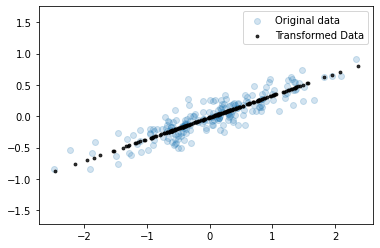

In [54]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, s=8, c='k')
plt.axis('equal');
plt.legend(['Original data','Transformed Data'])

In [55]:
pca.components_

array([[-0.94446029, -0.32862557]])

The light points are the original data, while the dark points are the projected version.

The information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

In [56]:
pca.explained_variance_ratio_

array([0.97634101])

Of course, real life applications will contain much more columns to reduce from. 

### PCA for visualization: Iris Dataset

In [57]:
from sklearn.datasets import load_iris

load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [58]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [59]:
print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [60]:
iris = load_iris()

X = iris.data
y = iris.target

In [61]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [62]:
X = pd.DataFrame(X, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
X.shape

(150, 4)

In [64]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
pca = PCA(n_components=2)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca.fit(X_std)

PCA(n_components=2)

In [67]:
pd.DataFrame(X_std, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:
# pca = PCA(n_components=2)
# pca.fit(X)

In [202]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [203]:
pd.DataFrame(pca.components_,columns=iris.feature_names,index=['PCA1','PCA2'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PCA1,0.521066,-0.269347,0.580413,0.564857
PCA2,0.377418,0.923296,0.024492,0.066942


In [204]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [205]:
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207])

In [46]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [209]:
pca.components_[1]

array([0.37741762, 0.92329566, 0.02449161, 0.06694199])

In [206]:
X_std[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [47]:
(0.52106591 * -0.900681) + (-0.26934744 * 1.019004) + (0.5804131 *-1.340227) + (0.56485654*-1.315444)

-2.26470273781193

In [210]:
(0.37741762 * -0.900681) + (0.92329566 * 1.019004) + (0.02449161 *-1.340227) + (0.06694199*-1.315444)

0.48002633523439

In [214]:
pca.transform(X_std)

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [215]:
pc1 = pca.transform(X_std)[:,0]
pc2 = pca.transform(X_std)[:,1]

Text(0, 0.5, 'PC2')

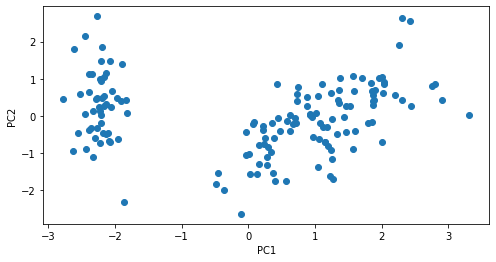

In [53]:
plt.figure(figsize=(8,4))
plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')

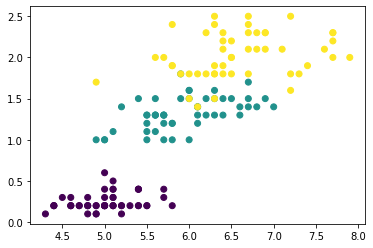

In [78]:
plt.scatter(X['sepal length (cm)'],X['petal width (cm)'],c=y)

In [55]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [56]:
pd.DataFrame(X_std, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [75]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'PC2')

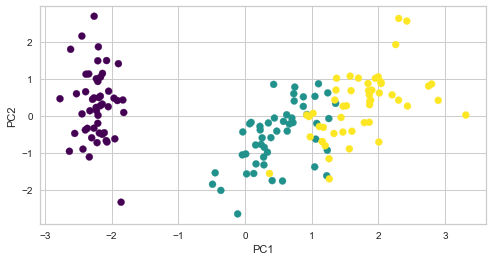

In [218]:
plt.figure(figsize=(8,4))
plt.scatter(pc1, pc2, c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')


In [221]:
plt.figure(figsize=(8,4))
sns.lmplot(x=pc1, y=pc2, hue=y)
plt.xlabel('PC1')
plt.ylabel('PC2')

TypeError: 'NoneType' object is not subscriptable

<Figure size 576x288 with 0 Axes>

In [222]:
pd.DataFrame(X_std, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:
pca.transform(X_std)

In [ ]:
#!pip install yellowbrick

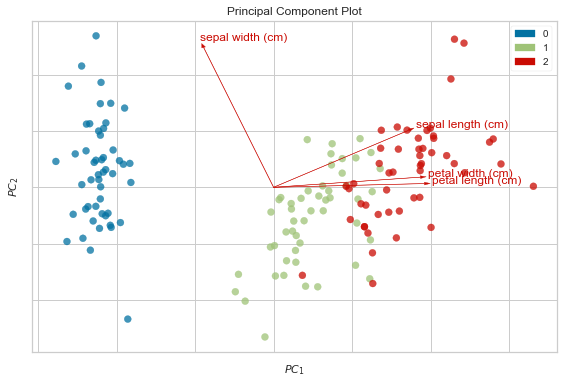

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [80]:
from yellowbrick.features.pca import PCADecomposition

visualizer = PCADecomposition(scale=True, proj_features=True,)

visualizer.fit_transform(pd.DataFrame(X_std, columns=iris.feature_names), y)
visualizer.show()

In [224]:
pd.DataFrame(pca.components_,columns=iris.feature_names,index=['PCA1','PCA2'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PCA1,0.521066,-0.269347,0.580413,0.564857
PCA2,0.377418,0.923296,0.024492,0.066942


In [223]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [ ]:
iris.target_names

In [234]:
pd.concat([pd.DataFrame(X_std, columns=iris.feature_names), pd.DataFrame(y, columns=['target'])], axis=1).groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,-1.014579,0.853263,-1.304987,-1.254893
1,0.112282,-0.661432,0.285324,0.166734
2,0.902297,-0.191831,1.019663,1.088159


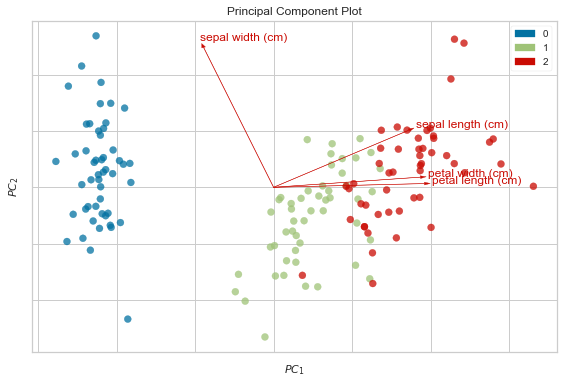

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [236]:
from yellowbrick.features.pca import PCADecomposition

visualizer = PCADecomposition(scale=True, proj_features=True,)

visualizer.fit_transform(pd.DataFrame(X_std, columns=iris.feature_names), y)
visualizer.show()


## Another example

In [84]:
df = pd.read_csv('USArrests.csv', index_col=0)

In [85]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [86]:
scaler = StandardScaler()
df_std=scaler.fit_transform(df)

In [87]:
pca=PCA(n_components=2)
pca.fit(df_std)

PCA(n_components=2)

In [90]:
pca.explained_variance_ratio_.cumsum()

array([0.62006039, 0.86750168])

In [256]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [260]:
pca.transform(df_std)

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399],
       [ 1.51456286, -0.98755509],
       [-1.35864746, -1.08892789],
       [ 0.04770931, -0.32535892],
       [ 3.01304227,  0.03922851],
       [ 1.63928304,  1.2789424 ],
       [-0.91265715, -1.57046001],
       [-1.63979985,  0.21097292],
       [ 1.37891072, -0.68184119],
       [-0.50546136, -0.15156254],
       [-2.25364607, -0.10405407],
       [-0.79688112, -0.2701647 ],
       [-0.75085907,  0.95844029],
       [ 1.56481798,  0.87105466],
       [-2.39682949,  0.37639158],
       [ 1.76336939,  0.42765519],
       [-0.48616629, -1.4744965 ],
       [ 2.10844115, -0.15539682],
       [-1.69268181, -0.63226125],
       [ 0.99649446,  2.39379599],
       [ 0.69678733, -0.26335479],
       [-1.18545191,  0.53687437],
       [-1.26563654, -0.19395373],
       [ 2.87439454, -0.7756002 ],
       [-2.38391541,

In [258]:
pc1=pca.transform(df_std)[:,0]
pc2=pca.transform(df_std)[:,1]

In [255]:
df.shape

(50, 4)

In [61]:
scaler = StandardScaler()
scaler.fit(df)

df_std = scaler.transform(df)

In [62]:
pca = PCA(n_components=2)

In [63]:
pca.fit(df_std)

PCA(n_components=2)

In [64]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

In [65]:
pca.explained_variance_ratio_.cumsum()

array([0.62006039, 0.86750168])

In [66]:
pc1 = pca.transform(df_std)[:, 0]
pc2 = pca.transform(df_std)[:, 1]

Text(0, 0.5, 'PC2')

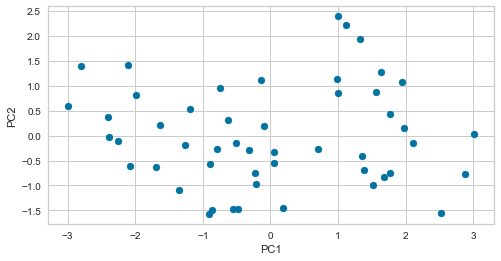

In [261]:
plt.figure(figsize=(8,4))
plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [68]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [ ]:
df

# Yellowbrick - visualization
`pip install yellowbrick`

In [275]:
pca=PCA(2)
pc1=pca.fit_transform(df)[:,0]
pc2=pca.fit_transform(df)[:,1]


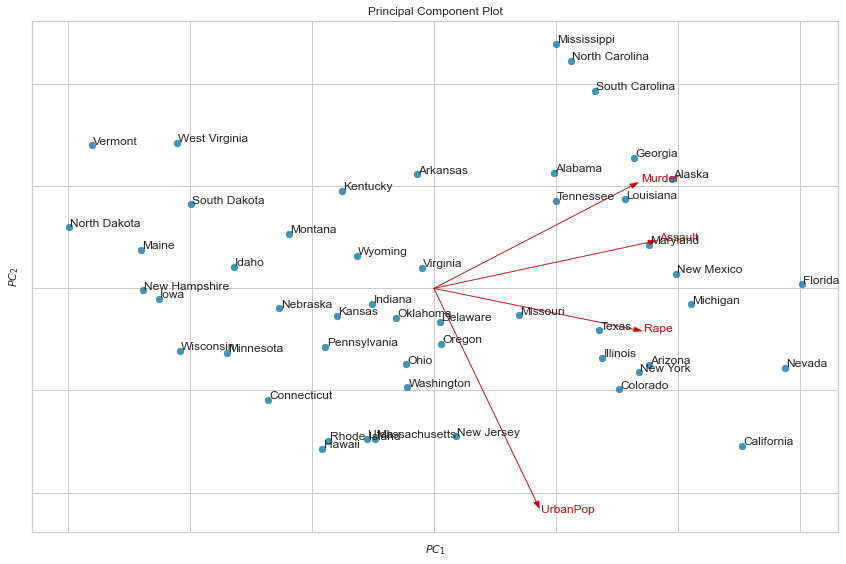

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [262]:

from yellowbrick.features.pca import PCADecomposition

fig, ax= plt.subplots(figsize=(12, 8))

visualizer = PCADecomposition(scale=True, proj_features=True,)
visualizer.fit_transform(pd.DataFrame(df_std, columns=df.columns))
for i in range(len(df)):
    ax.annotate(df.index[i], (pc1[i] + 0.01, pc2[i] + 0.01))

visualizer.show(ax=ax)



### 3D

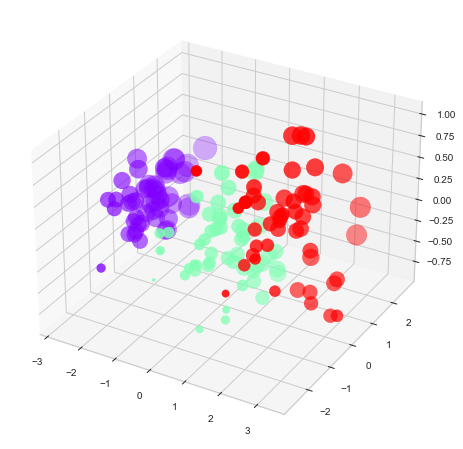

In [71]:
pca = PCA(3)
pca.fit(X_std)

pc1 = pca.transform(X_std)[:,0]
pc2 = pca.transform(X_std)[:,1]
pc3 = pca.transform(X_std)[:,2]

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d',)
ax.scatter3D(pc1, pc2, pc3, c=y, s=X_std[:,1] * 100 - X_std[:,1].min()*100 + 10, cmap='rainbow');


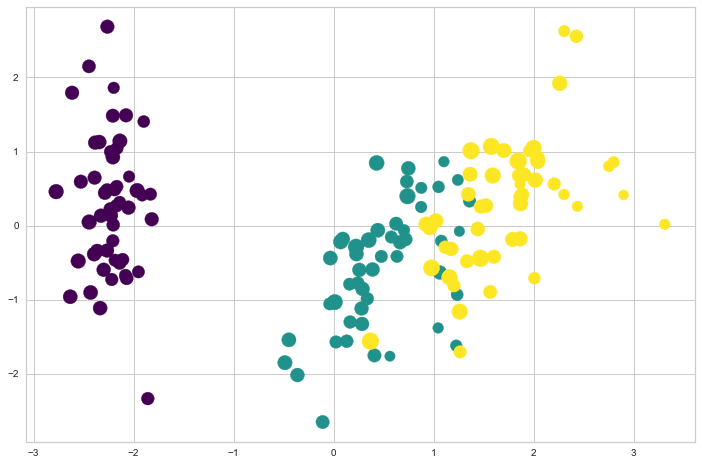

In [72]:
pca = PCA(3)
pca.fit(X_std)

pc1 = pca.transform(X_std)[:,0]
pc2 = pca.transform(X_std)[:,1]
pc3 = pca.transform(X_std)[:,2]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pc1, pc2, s=(pc3 - pc3.min() + 1)* 100, c=y, cmap='viridis')

# ax.scatter3D(pc1, pc2, pc3, c=y, s=X_std[:,1] * 100 - X_std[:,1].min()*100 + 10, cmap='rainbow');


In [73]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

## PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. 

In [115]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [116]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [117]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [118]:
len(digits['data'][0])

64

In [119]:
pd.DataFrame(digits['data'][0:2])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [120]:
digits['data'][100].reshape(8,8)

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

In [121]:
import matplotlib as mp
mp.__version__

'3.3.3'

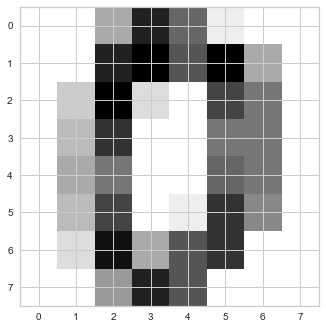

In [139]:
plt.imshow(digits['data'][0].reshape(8,8), cmap='binary')

In [123]:
pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(64)])

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [124]:
X = pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(64)])
X.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [125]:
pca = PCA(2) 

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

pca.fit(X_std)

PCA(n_components=2)

In [126]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [127]:
pca.explained_variance_ratio_.sum()

0.21594970498237193

## Transform from 64 variables to 2 variables

In [128]:
pc1 = pca.transform(X_std)[:, 0]
pc2 = pca.transform(X_std)[:, 1]

In [129]:
import pandas as pd
df = pd.DataFrame({'pc1': pc1, 'pc2':pc2})
df.head()

,pc1,pc2
0,1.914214,-0.954497
1,0.588981,0.924635
2,1.302040,-0.317197
3,-3.020771,-0.868767
4,4.528949,-1.093475


We can now plot the first two principal components of each point to learn about the data:

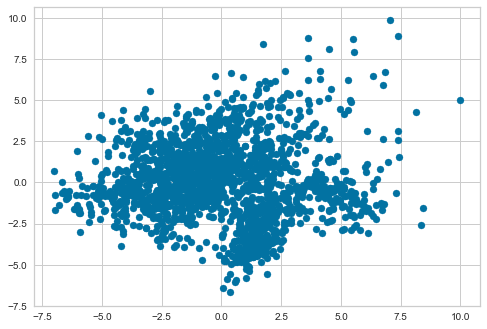

In [130]:
plt.scatter(pc1, pc2)

In [307]:
pca.components_

array([[-1.24988966e-17, -1.82234510e-01, -2.85867992e-01,
        -2.20369097e-01,  2.51696213e-02,  9.49657866e-03,
         5.24758946e-02,  6.26951962e-02, -3.47074869e-02,
        -2.45533556e-01, -2.29151428e-01,  1.07943941e-01,
        -3.62019378e-02, -3.87122086e-02,  8.37800941e-02,
         9.27754905e-02, -1.66992011e-02, -1.36716320e-01,
         6.30507019e-02,  1.22878917e-01, -1.48193098e-01,
         2.34837849e-02,  1.71199323e-01,  1.04209179e-01,
         3.94908938e-03,  1.16389961e-01,  1.88204473e-01,
        -6.58606251e-02, -1.43532012e-01,  1.28206891e-01,
         1.80620476e-01,  5.27103172e-02,  0.00000000e+00,
         2.38902655e-01,  2.35005893e-01,  5.09155719e-03,
         1.31096471e-02,  1.59116906e-01,  1.29394261e-01,
         0.00000000e+00,  5.55995777e-02,  1.87156929e-01,
         1.53533213e-01,  4.68257637e-02,  1.10892749e-01,
         1.07209873e-01, -1.79262369e-02,  2.27181548e-03,
         2.88180854e-02, -4.08684352e-02, -1.10271306e-0

In [91]:
digits.target.shape

(1797,)

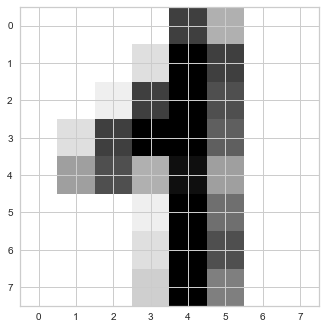

In [141]:
plt.imshow(digits['data'][42].reshape(8,8), cmap='binary')

In [142]:
np.sum(X_std[42]*pca.components_[0])

1.9904780987840014

In [143]:
np.sum(X_std[42]*pca.components_[1])

1.3659001211515034

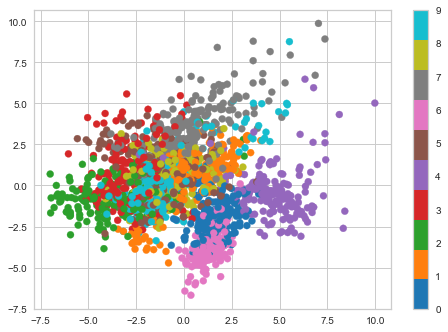

In [92]:
plt.scatter(pc1, pc2, c=digits.target, cmap='tab10')
plt.colorbar()

No handles with labels found to put in legend.


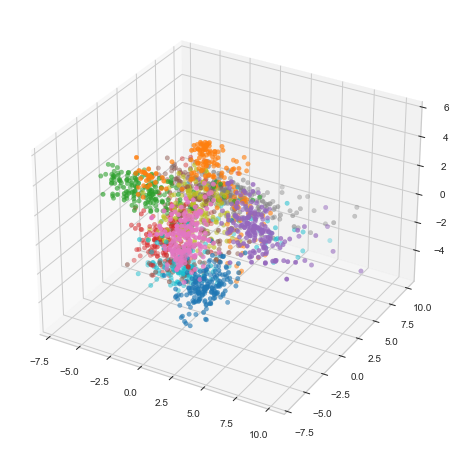

In [319]:
pca = PCA(3)
pca.fit(X_std)

pc1 = pca.transform(X_std)[:,0]
pc2 = pca.transform(X_std)[:,1]
pc3 = pca.transform(X_std)[:,2]

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d',)
ax.scatter3D(pc1, pc2, pc3, c=digits.target, cmap='tab10')
ax.legend();


In [144]:
pca.explained_variance_ratio_#.cumsum()

array([0.12033916, 0.09561054])

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

In [323]:
pca = PCA(64)
pca.fit(X_std)

PCA(n_components=64)

In [101]:
pca.n_components_

64

In [324]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

In [325]:
pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732, 0.81933664, 0.83099501, 0.84157148, 0.85132464,
       0.86077023, 0.86940036, 0.87776679, 0.88574372, 0.89320844,
       0.90046426, 0.90738337, 0.91392246, 0.92033038, 0.92624422,
       0.93195585, 0.93719222, 0.94201029, 0.94654748, 0.95077911,
       0.95483964, 0.95881049, 0.96237542, 0.9657833 , 0.96906165,
       0.97217197, 0.97505772, 0.97782262, 0.98041436, 0.98275919,
       0.98494176, 0.98697774, 0.98893286, 0.99076605, 0.99244551,
       0.99405787, 0.9955355 , 0.99688668, 0.99813769, 0.99917465,
       1.        , 1.        , 1.        , 1.        ])

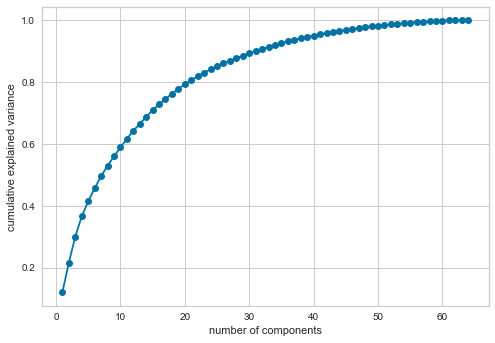

In [104]:
plt.plot(np.arange(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [105]:
pca = PCA(0.8)
pca.fit(X_std)
pca.n_components_

21

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

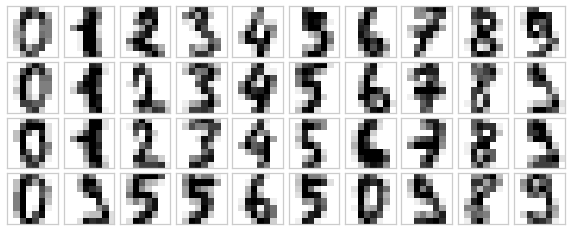

In [106]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

In [107]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [108]:
np.random.normal(digits.data, scale=2)

array([[ 0.24559963, -0.16511799,  1.49857031, ...,  0.3249697 ,
         0.45501943, -0.95668306],
       [ 2.78847398,  2.29994298, -3.23028145, ...,  5.93751919,
        -1.44911409,  0.95064449],
       [ 3.41341072,  1.56114815,  0.44183424, ..., 17.17985185,
         7.52641251, -1.58222723],
       ...,
       [ 0.40448062,  3.48166787,  2.15615085, ...,  4.91178294,
        -1.70860481,  2.98353551],
       [ 3.28499176,  2.07927874,  2.56346462, ..., 11.30894033,
         0.08870198, -0.49958015],
       [-1.01389883, -1.58702352,  9.68758112, ..., 14.13908486,
        -1.01900319,  0.41434494]])

In [326]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## Add noise to our data

We'll use `np.random.normal` to create random numbers that follow a normal distribution. That is, if the number is 15 for example, we will switch it by a value picked from a normal distribution that has the mean centered at 15, with a standard deviation specified by us.

In [109]:
np.random.normal(loc=0)

0.8555682752700302

In [110]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

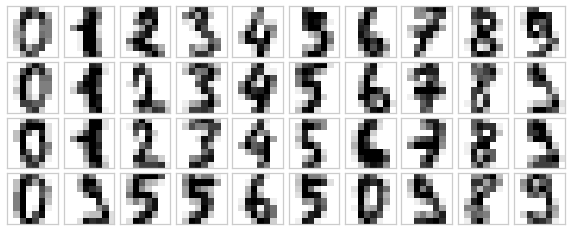

In [111]:
plot_digits(digits.data)

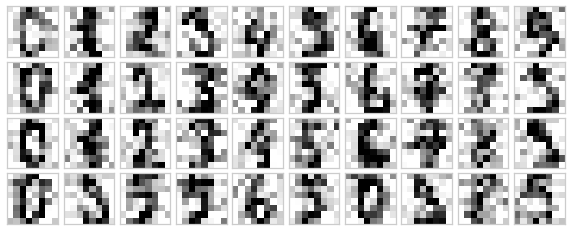

In [112]:
np.random.seed(42)
noisy = np.random.normal(loc=digits.data, scale=4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [113]:
pca = PCA(0.5)
pca.fit(noisy)
pca.n_components_

12

The results show that 12 components are necessary to preserve 50% of the information.

Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

In [115]:
results = pca.transform(noisy)
results.shape

(1797, 12)

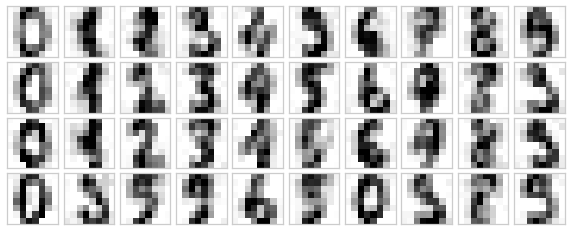

In [116]:
filtered = pca.inverse_transform(results)
plot_digits(filtered)

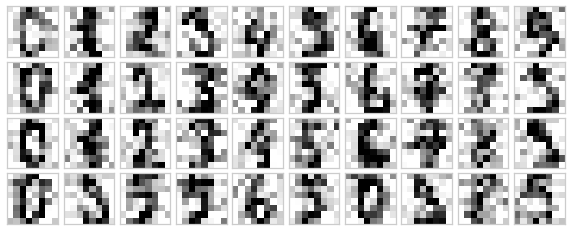

In [117]:
plot_digits(noisy)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

----

# Extra: EigenFaces

In [327]:
from sklearn.datasets import fetch_lfw_people

In [335]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [336]:
lfw_dataset.images[1].shape

(62, 47)

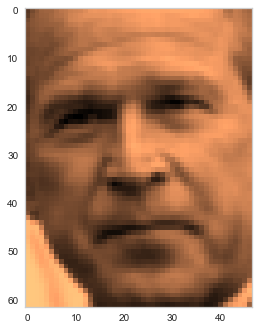

In [353]:
plt.imshow(lfw_dataset.images[1138], cmap='copper')
plt.grid(False)

In [338]:
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

In [339]:
h * w

2914

In [340]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [341]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150)
pca.fit(X_std)

PCA(n_components=150)

In [342]:
pca.explained_variance_ratio_.sum()

0.9464058

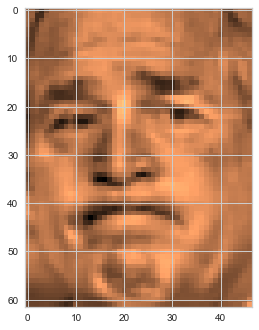

In [128]:
plt.imshow(X_std[0, :].reshape(h, w), cmap='copper')

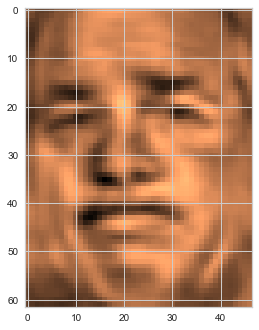

In [343]:
plt.imshow(pca.inverse_transform(pca.transform(X_std))[0, :].reshape(h,w), cmap='copper')

In [131]:
pca.components_.shape

(150, 2914)

In [132]:
pca.components_

array([[-4.5335246e-03, -4.9599987e-03, -5.5279923e-03, ...,
        -2.1939648e-03, -1.8497099e-03, -1.4429657e-03],
       [ 1.3528820e-02,  1.3154715e-02,  1.3364133e-02, ...,
        -9.9677742e-03, -9.8682391e-03, -9.8864119e-03],
       [-2.0082852e-02, -2.1783568e-02, -2.3786325e-02, ...,
        -2.3545392e-03, -2.0310842e-03, -1.2147042e-03],
       ...,
       [ 2.6870169e-02,  2.5783785e-02,  1.0526036e-02, ...,
         5.3615798e-03, -3.7092136e-03, -1.6817242e-02],
       [ 5.2534003e-02,  3.2758191e-02, -8.4527954e-03, ...,
        -1.1907090e-02, -2.6536357e-02, -2.0334892e-02],
       [-5.9832870e-05,  9.1209756e-03,  7.5538252e-03, ...,
        -1.1785614e-02, -1.3616154e-02, -3.1687524e-02]], dtype=float32)

In [133]:
pca.explained_variance_ratio_

array([0.2299954 , 0.16179246, 0.07093438, 0.05205124, 0.03511936,
       0.02852243, 0.02095521, 0.01820898, 0.01657685, 0.01614774,
       0.01371492, 0.01330671, 0.01171856, 0.01030595, 0.00955528,
       0.0090164 , 0.00884688, 0.00750348, 0.00653757, 0.00642236,
       0.0061768 , 0.00592947, 0.00547741, 0.00532408, 0.00488731,
       0.00466461, 0.00447778, 0.00432565, 0.0040174 , 0.00382712,
       0.00365815, 0.00355519, 0.00346673, 0.00333422, 0.00318308,
       0.0030884 , 0.00298711, 0.00283978, 0.00274189, 0.00267207,
       0.00263503, 0.00257522, 0.00253497, 0.00248078, 0.00244636,
       0.00232602, 0.00225098, 0.00220771, 0.0021456 , 0.0020952 ,
       0.00206551, 0.00201347, 0.00194598, 0.0019377 , 0.00190903,
       0.00186658, 0.00180808, 0.00171544, 0.00169467, 0.00167232,
       0.00165428, 0.00159217, 0.00156094, 0.00152823, 0.00148223,
       0.00146226, 0.00143269, 0.00141573, 0.00141092, 0.00137287,
       0.00137235, 0.00135808, 0.00131192, 0.00128799, 0.00127

- `you can plot the components itself`

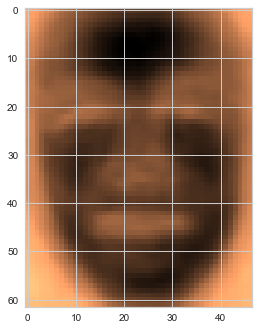

In [134]:
plt.imshow(pca.components_[0].reshape(h, w), cmap='copper')

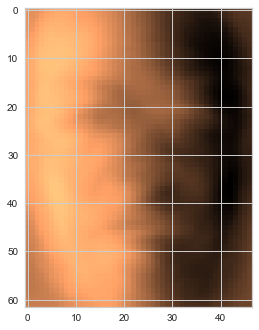

In [135]:
plt.imshow(pca.components_[1].reshape(h, w), cmap='copper')

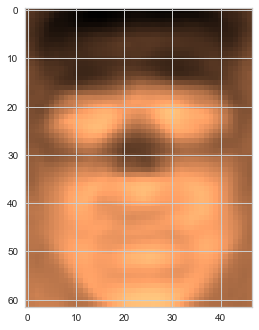

In [136]:
plt.imshow(pca.components_[2].reshape(h, w), cmap='copper')

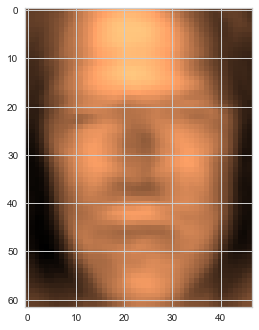

In [137]:
plt.imshow(pca.components_[3].reshape(h, w), cmap='copper')

In [138]:
df_transformed = pca.transform(X_std)
df_transformed

array([[-2.0907631e+01, -5.9014335e+00,  1.0632656e+00, ...,
         8.5815257e-01,  3.0570939e-02,  1.2773733e+00],
       [-3.5006306e+01,  6.6103468e+00, -4.5455036e+00, ...,
         5.1786971e-01,  5.6138575e-01,  1.6459036e-01],
       [ 1.8827646e+01,  1.5613192e+01, -2.5604100e+00, ...,
        -3.1529164e-01,  3.3634377e-01, -5.7310838e-01],
       ...,
       [-2.3026199e+01, -1.5058448e+01, -3.0615141e+01, ...,
        -1.2863533e+00,  1.8802248e+00,  6.7460322e-01],
       [-1.3343813e+01, -2.6845871e+01, -1.7819557e+01, ...,
        -7.7631056e-01,  2.2330284e-01,  8.6186373e-01],
       [ 5.0880333e+01,  3.7785221e+01, -5.2877865e+00, ...,
        -1.0141797e+00, -2.0120845e+00,  7.8377879e-01]], dtype=float32)

In [ ]:
df_transformed[:, 0]

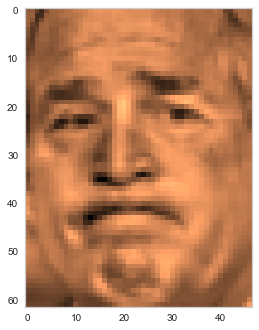

In [139]:
plt.imshow(X_std[0, :].reshape(h, w), cmap='copper')
plt.grid(False)

- The inverse transform is a combination of each `component` and you can see the image being recreated for each component you add.

In [140]:
pca.mean_

array([-7.9472864e-09, -2.0861625e-08,  4.1697108e-09, ...,
       -2.1436758e-08, -1.7933678e-08,  1.5267155e-08], dtype=float32)

1 components - explained variance: 0.22999539971351624


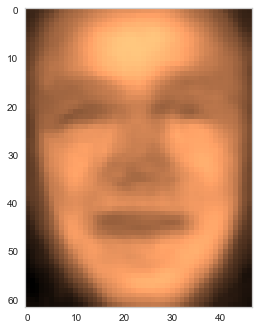

2 components - explained variance: 0.3917878568172455


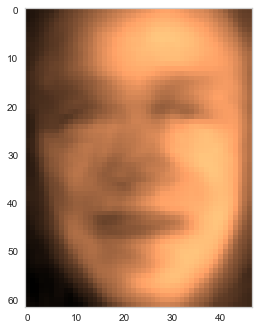

3 components - explained variance: 0.4627222418785095


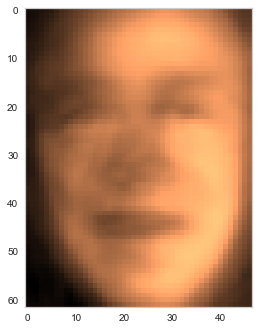

4 components - explained variance: 0.5147734880447388


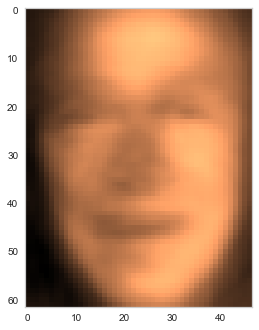

5 components - explained variance: 0.5498928427696228


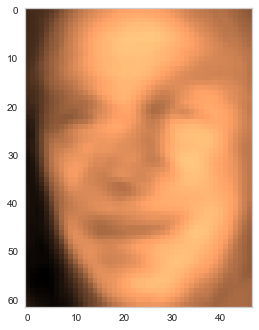

6 components - explained variance: 0.5784152746200562


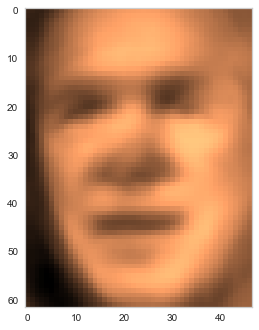

7 components - explained variance: 0.5993704795837402


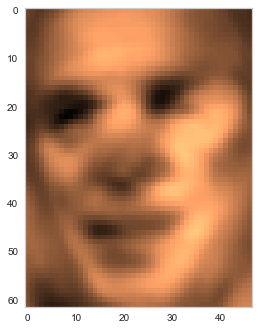

8 components - explained variance: 0.617579460144043


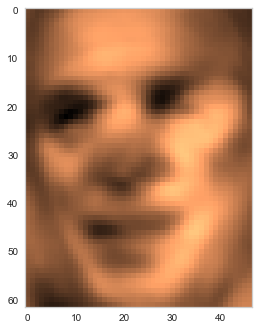

9 components - explained variance: 0.6341562867164612


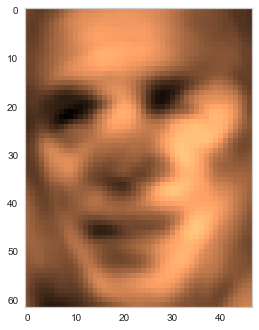

10 components - explained variance: 0.6503040194511414


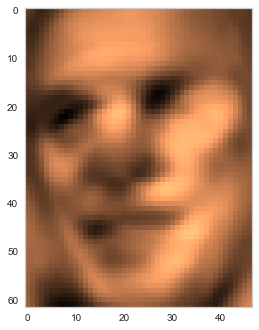

11 components - explained variance: 0.6640189290046692


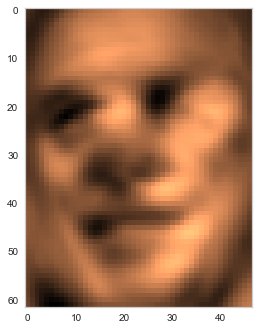

12 components - explained variance: 0.6773256659507751


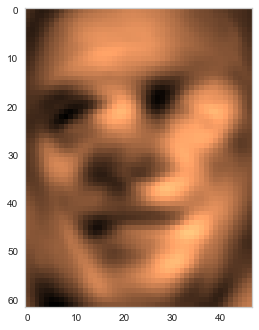

13 components - explained variance: 0.6890442371368408


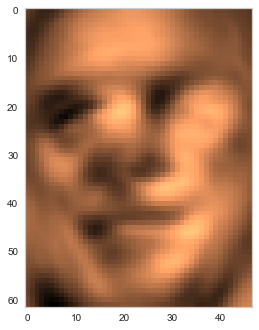

14 components - explained variance: 0.6993501782417297


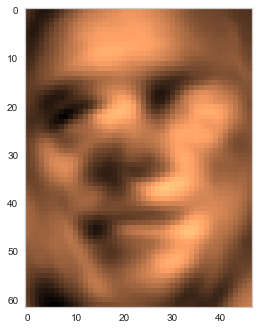

15 components - explained variance: 0.7089054584503174


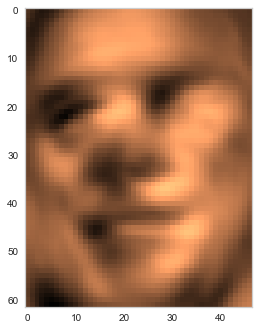

16 components - explained variance: 0.7179218530654907


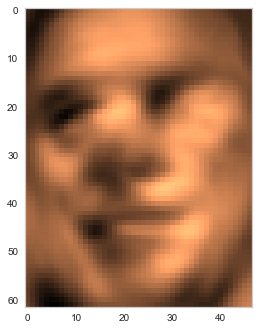

17 components - explained variance: 0.7267687320709229


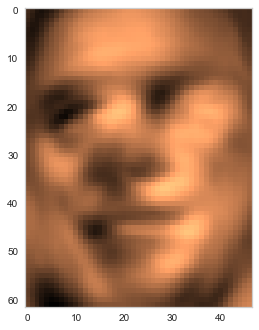

18 components - explained variance: 0.7342721819877625


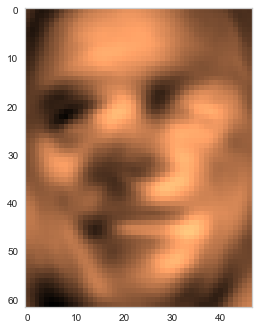

19 components - explained variance: 0.7408097386360168


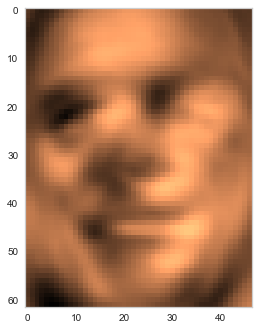

20 components - explained variance: 0.7472320795059204


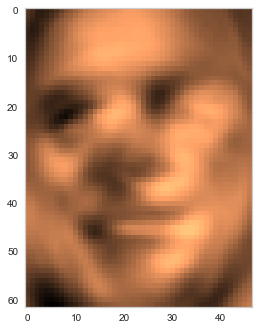

21 components - explained variance: 0.7534088492393494


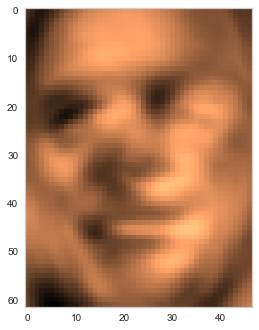

22 components - explained variance: 0.7593383193016052


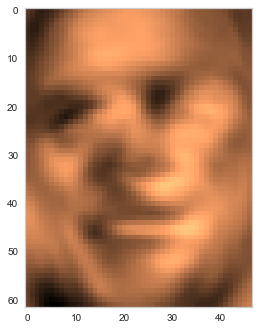

23 components - explained variance: 0.7648157477378845


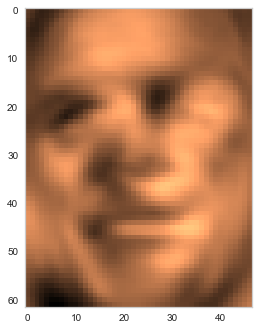

24 components - explained variance: 0.7701399326324463


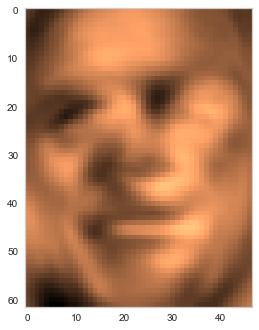

25 components - explained variance: 0.7750272750854492


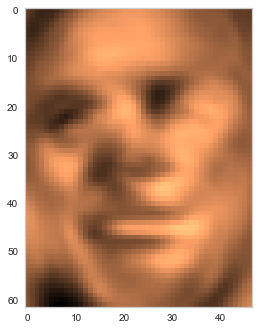

26 components - explained variance: 0.7796918749809265


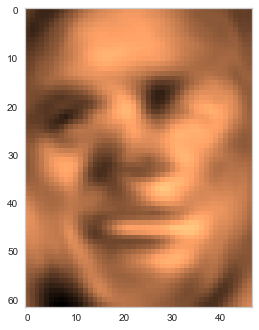

27 components - explained variance: 0.7841696739196777


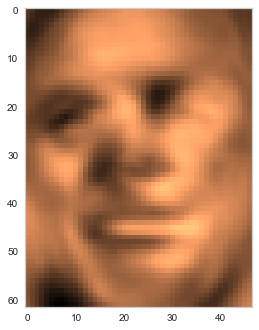

28 components - explained variance: 0.7884953022003174


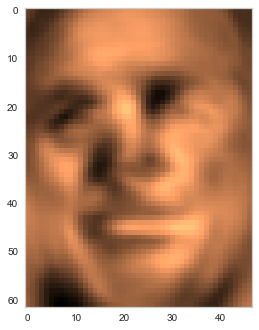

29 components - explained variance: 0.7925127148628235


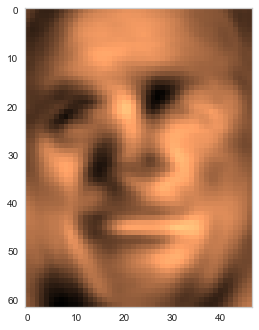

30 components - explained variance: 0.7963398098945618


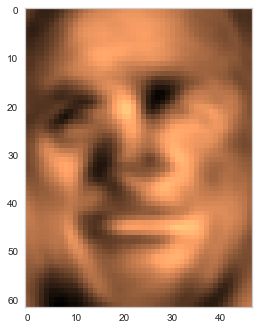

31 components - explained variance: 0.7999979853630066


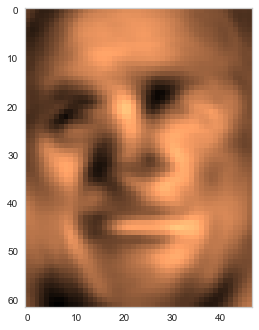

32 components - explained variance: 0.8035531044006348


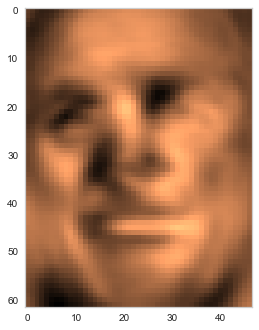

33 components - explained variance: 0.807019829750061


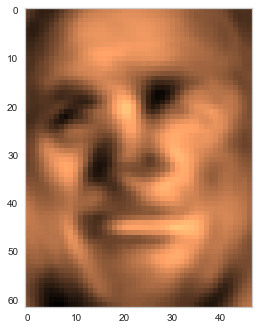

34 components - explained variance: 0.8103540539741516


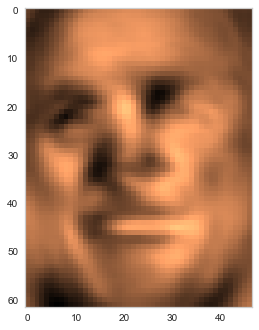

35 components - explained variance: 0.8135371208190918


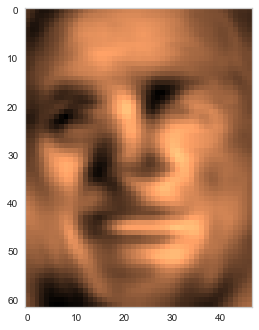

36 components - explained variance: 0.8166255354881287


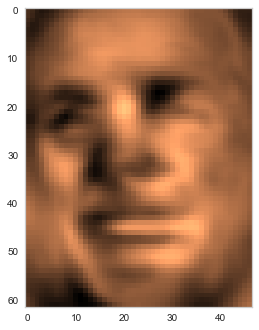

37 components - explained variance: 0.8196126222610474


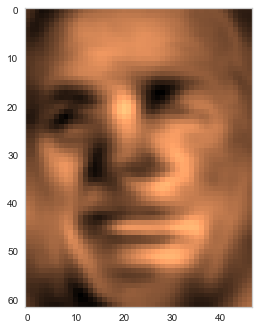

38 components - explained variance: 0.8224524259567261


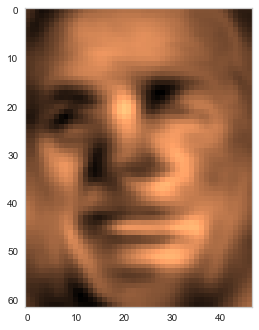

39 components - explained variance: 0.8251942992210388


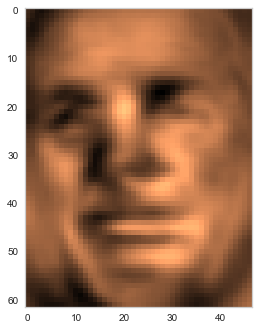

40 components - explained variance: 0.8278663754463196


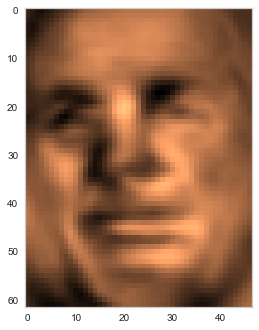

41 components - explained variance: 0.83050137758255


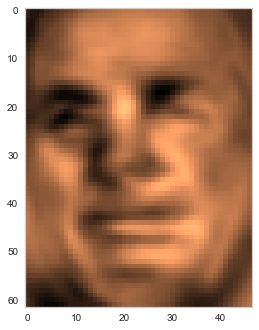

42 components - explained variance: 0.8330765962600708


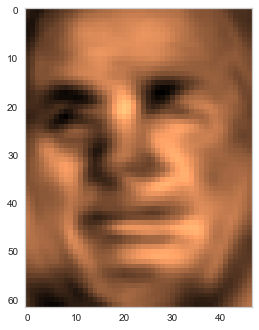

43 components - explained variance: 0.8356115818023682


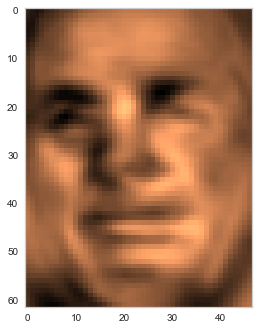

44 components - explained variance: 0.8380923867225647


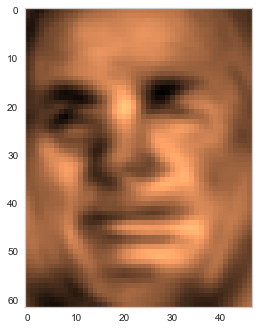

45 components - explained variance: 0.840538740158081


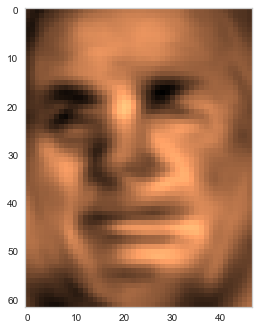

46 components - explained variance: 0.8428647518157959


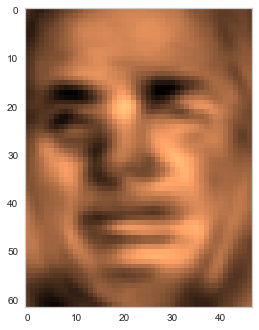

47 components - explained variance: 0.8451157212257385


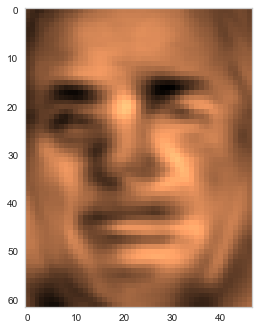

48 components - explained variance: 0.8473234176635742


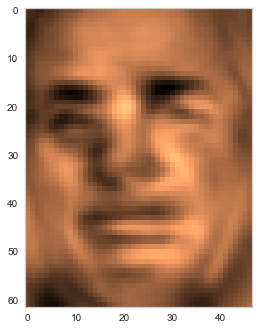

49 components - explained variance: 0.849469006061554


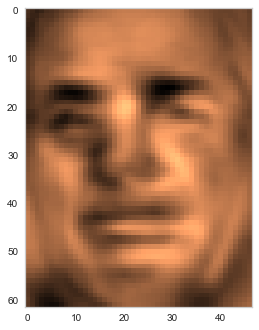

50 components - explained variance: 0.8515642285346985


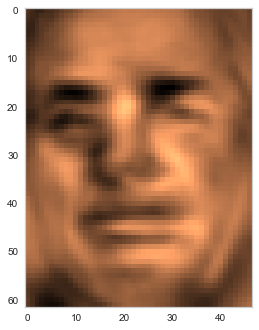

51 components - explained variance: 0.8536297678947449


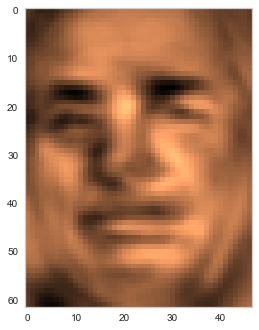

52 components - explained variance: 0.8556432127952576


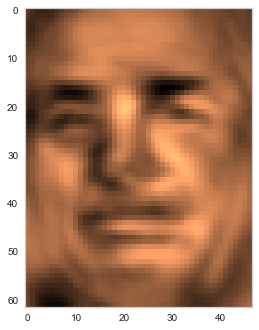

53 components - explained variance: 0.8575891852378845


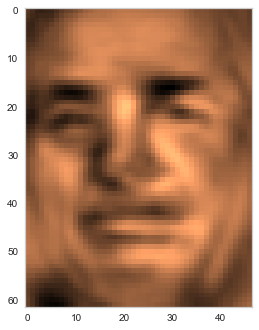

54 components - explained variance: 0.8595268726348877


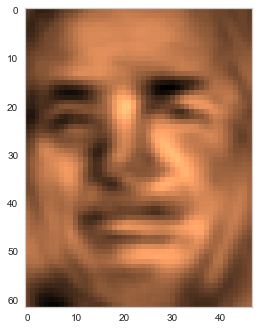

55 components - explained variance: 0.8614358901977539


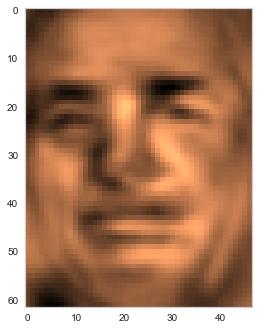

56 components - explained variance: 0.8633025288581848


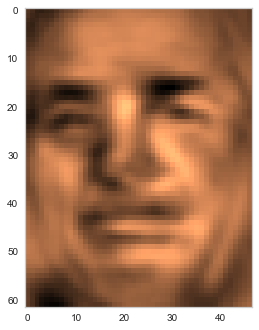

57 components - explained variance: 0.8651106357574463


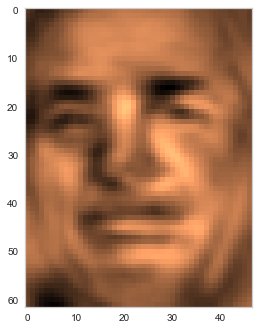

58 components - explained variance: 0.866826057434082


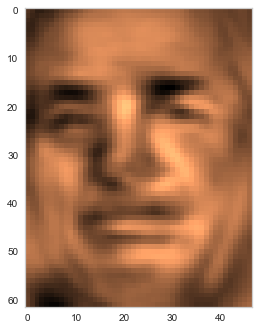

59 components - explained variance: 0.8685207366943359


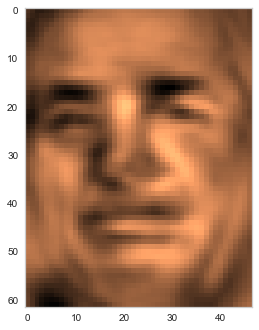

60 components - explained variance: 0.8701930642127991


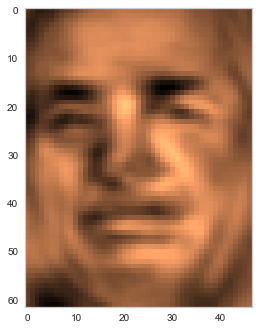

61 components - explained variance: 0.8718473315238953


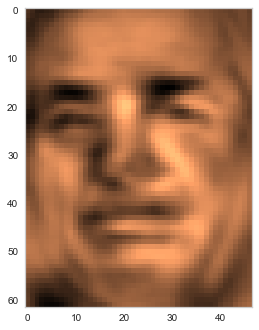

62 components - explained variance: 0.8734394907951355


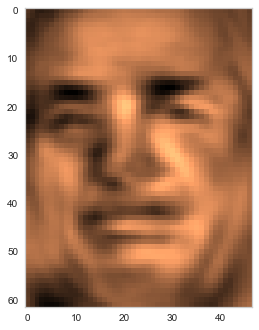

63 components - explained variance: 0.8750004172325134


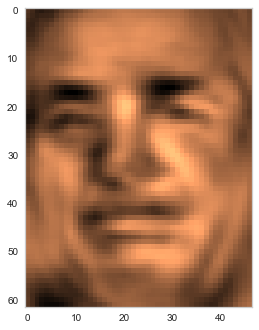

64 components - explained variance: 0.8765286207199097


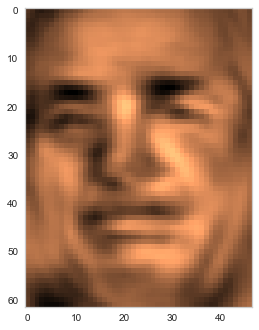

65 components - explained variance: 0.8780108690261841


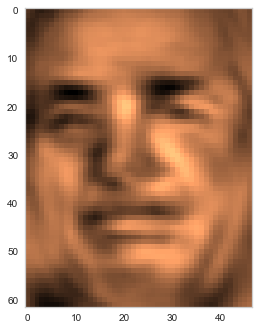

66 components - explained variance: 0.8794731497764587


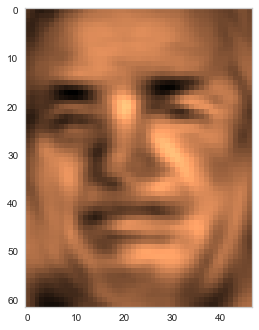

67 components - explained variance: 0.8809058666229248


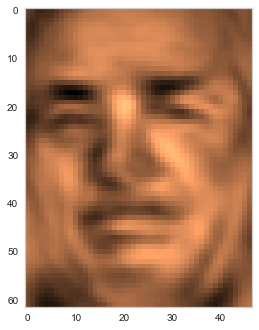

68 components - explained variance: 0.8823215961456299


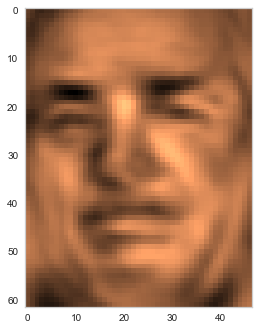

69 components - explained variance: 0.8837324976921082


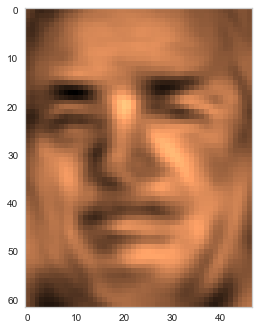

70 components - explained variance: 0.8851053714752197


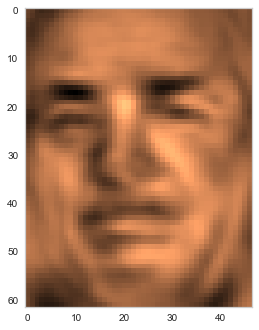

71 components - explained variance: 0.8864777088165283


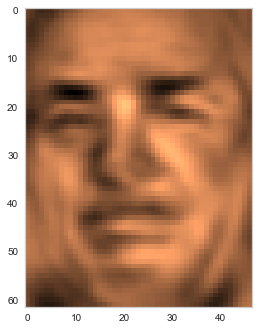

72 components - explained variance: 0.8878357410430908


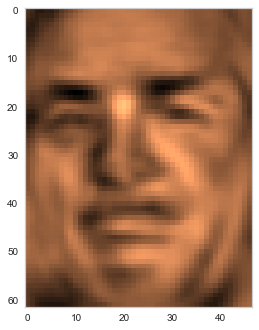

73 components - explained variance: 0.8891476392745972


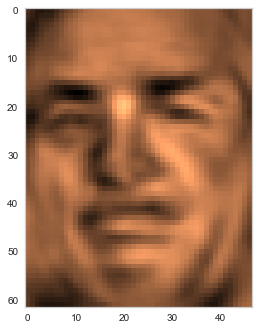

74 components - explained variance: 0.8904356360435486


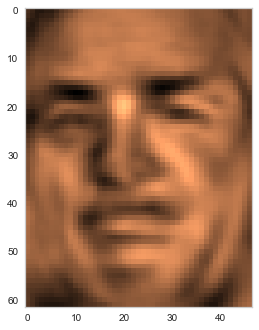

75 components - explained variance: 0.8917143940925598


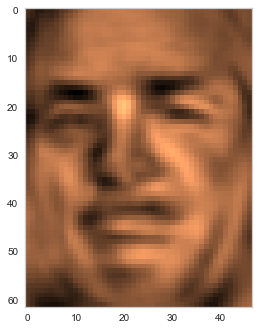

76 components - explained variance: 0.8929599523544312


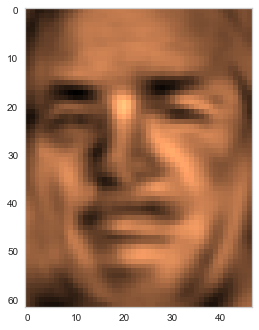

77 components - explained variance: 0.894189178943634


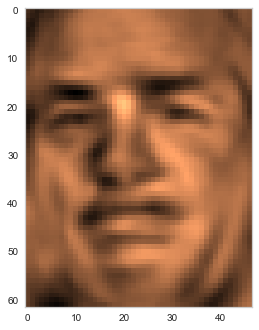

78 components - explained variance: 0.8953990340232849


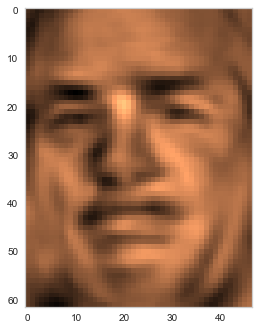

79 components - explained variance: 0.8965998888015747


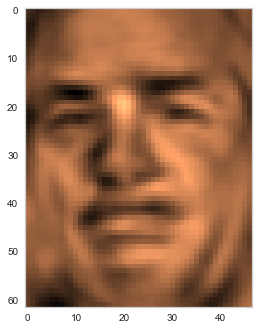

80 components - explained variance: 0.8977575302124023


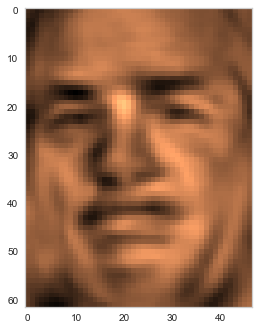

81 components - explained variance: 0.8988993167877197


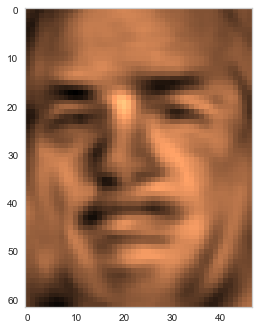

82 components - explained variance: 0.8999945521354675


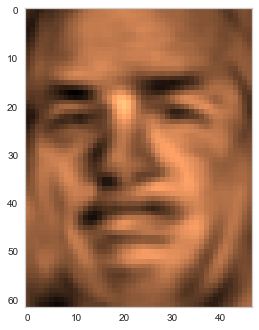

83 components - explained variance: 0.9010826945304871


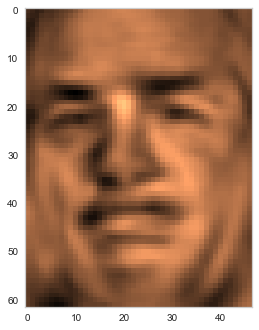

84 components - explained variance: 0.902151346206665


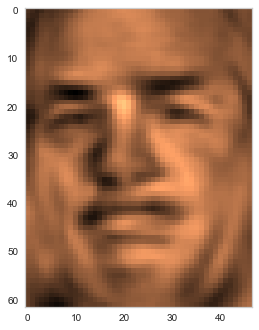

85 components - explained variance: 0.9031975269317627


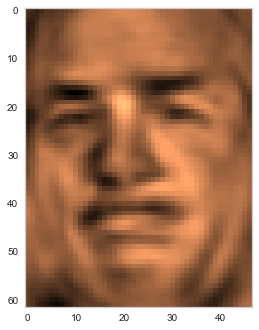

86 components - explained variance: 0.9042330384254456


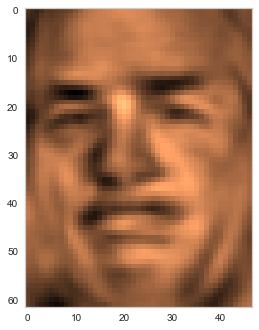

87 components - explained variance: 0.9052529335021973


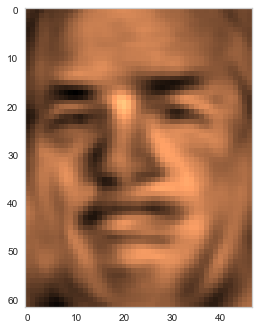

88 components - explained variance: 0.9062489867210388


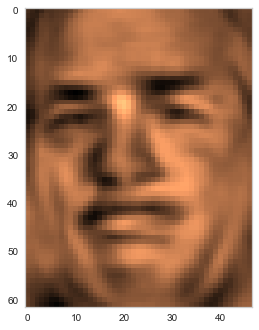

89 components - explained variance: 0.9072359204292297


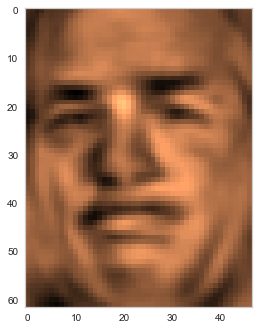

90 components - explained variance: 0.9082011580467224


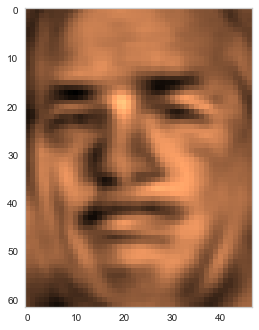

91 components - explained variance: 0.9091472029685974


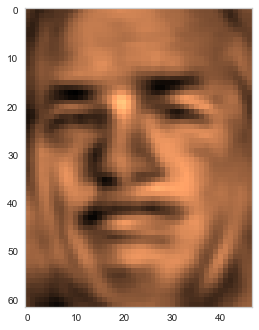

92 components - explained variance: 0.9100817441940308


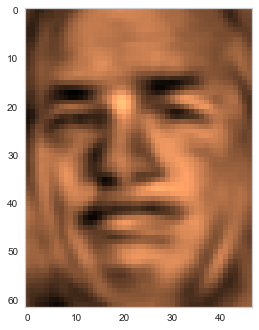

93 components - explained variance: 0.9110033512115479


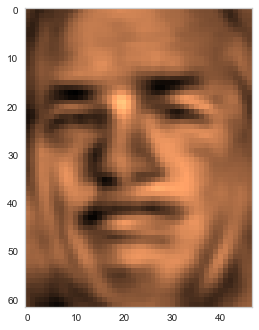

94 components - explained variance: 0.911909818649292


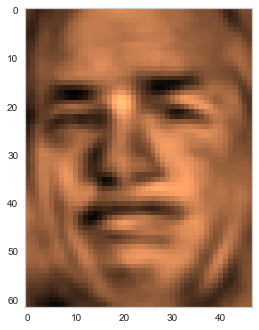

95 components - explained variance: 0.9128106832504272


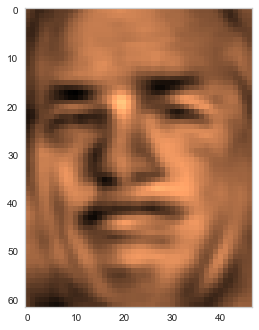

96 components - explained variance: 0.9136994481086731


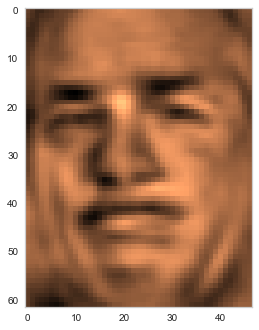

97 components - explained variance: 0.9145815372467041


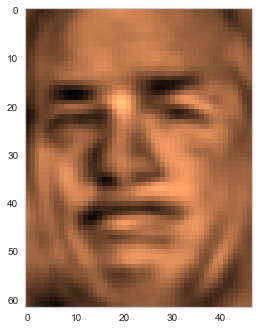

98 components - explained variance: 0.9154437780380249


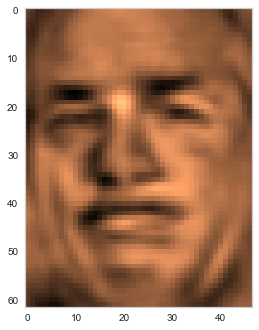

99 components - explained variance: 0.9162828326225281


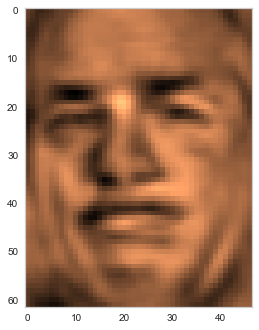

100 components - explained variance: 0.9171187281608582


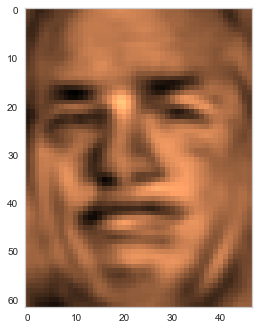

101 components - explained variance: 0.9179280996322632


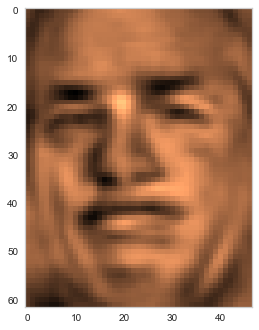

102 components - explained variance: 0.9187329411506653


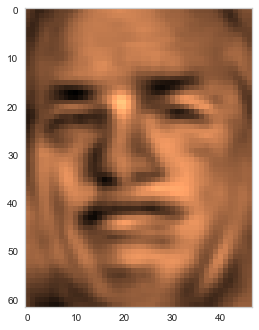

103 components - explained variance: 0.919518768787384


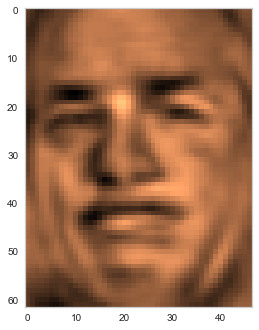

104 components - explained variance: 0.9202852845191956


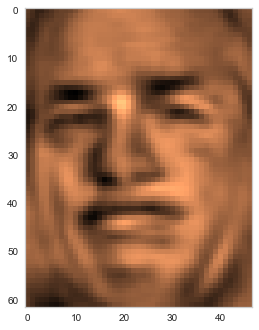

105 components - explained variance: 0.921043336391449


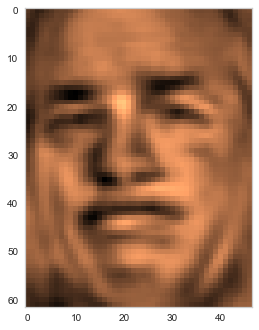

106 components - explained variance: 0.9217935800552368


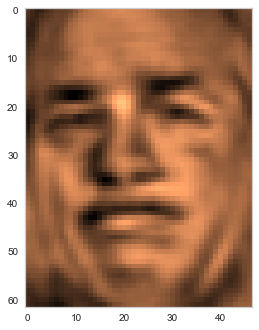

107 components - explained variance: 0.9225397706031799


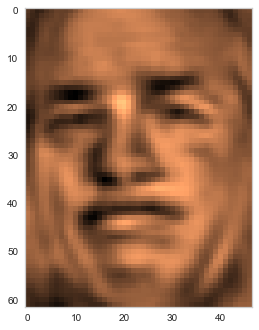

108 components - explained variance: 0.9232730865478516


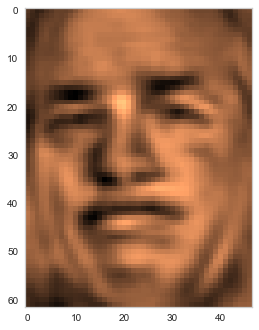

109 components - explained variance: 0.9239897727966309


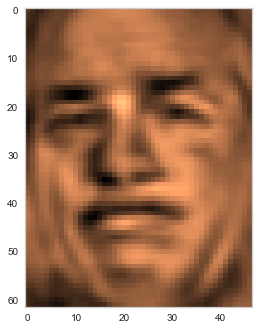

110 components - explained variance: 0.9246885776519775


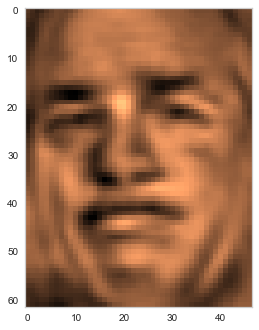

111 components - explained variance: 0.9253823161125183


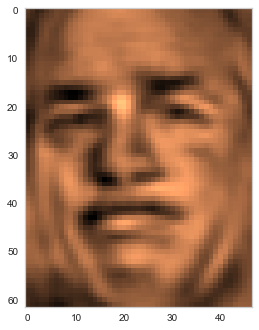

112 components - explained variance: 0.9260632991790771


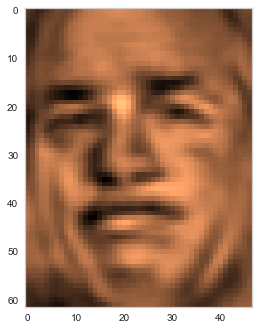

113 components - explained variance: 0.9267338514328003


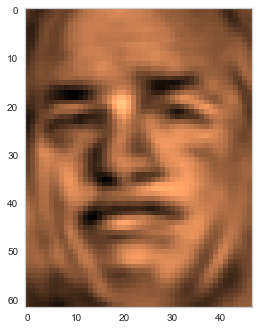

114 components - explained variance: 0.9274006485939026


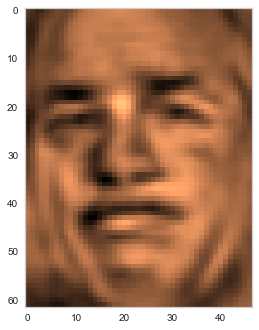

115 components - explained variance: 0.9280644655227661


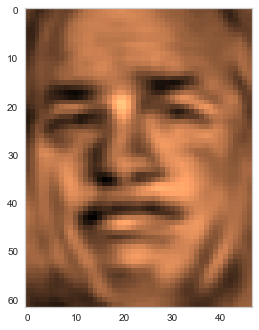

116 components - explained variance: 0.928718626499176


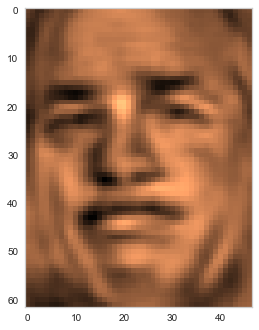

117 components - explained variance: 0.9293638467788696


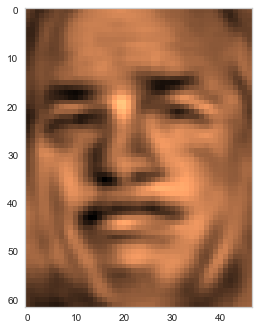

118 components - explained variance: 0.9300023317337036


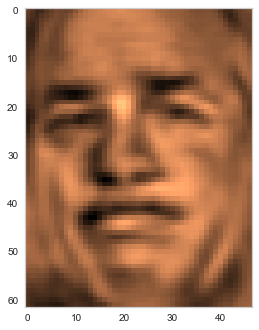

119 components - explained variance: 0.9306368231773376


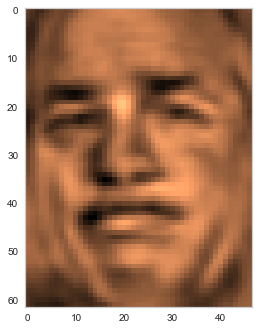

120 components - explained variance: 0.9312583208084106


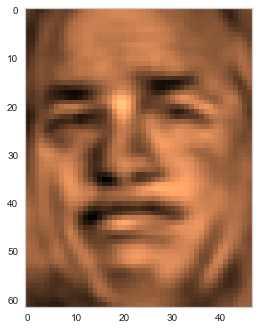

121 components - explained variance: 0.9318670630455017


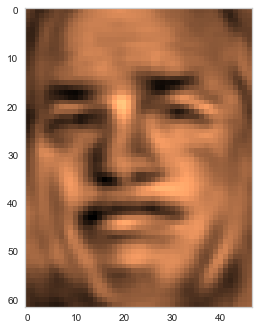

122 components - explained variance: 0.9324692487716675


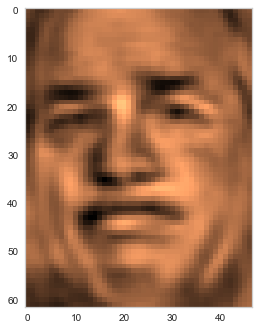

123 components - explained variance: 0.9330653548240662


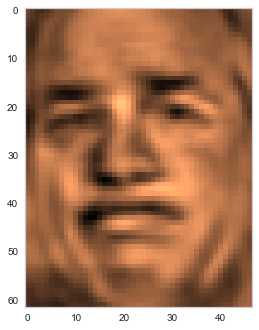

124 components - explained variance: 0.9336481094360352


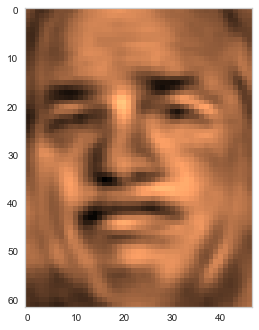

125 components - explained variance: 0.9342285990715027


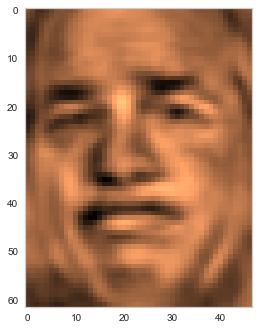

126 components - explained variance: 0.9348028898239136


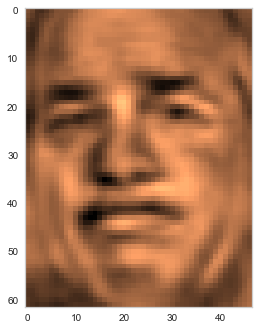

127 components - explained variance: 0.9353671669960022


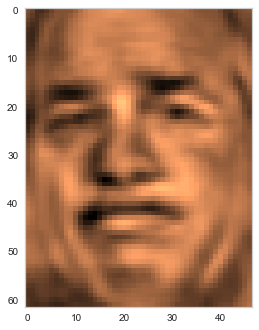

128 components - explained variance: 0.9359229207038879


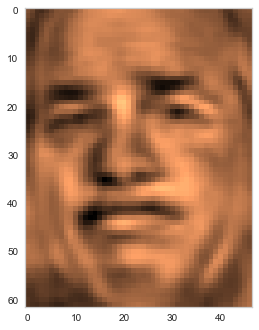

129 components - explained variance: 0.9364732503890991


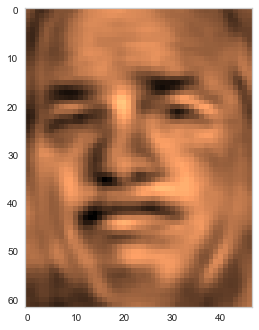

130 components - explained variance: 0.9370115399360657


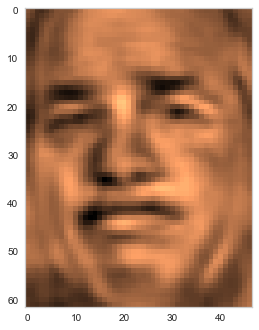

131 components - explained variance: 0.9375472068786621


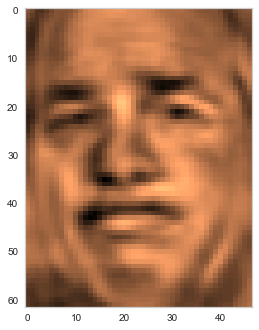

132 components - explained variance: 0.9380737543106079


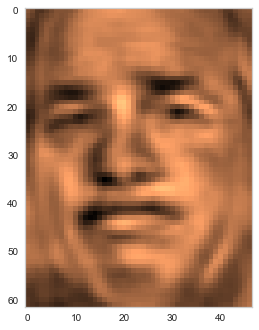

133 components - explained variance: 0.938595175743103


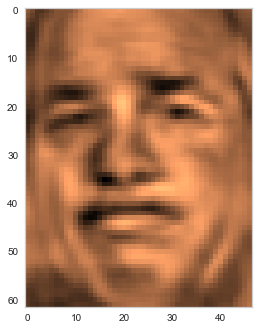

134 components - explained variance: 0.9391108751296997


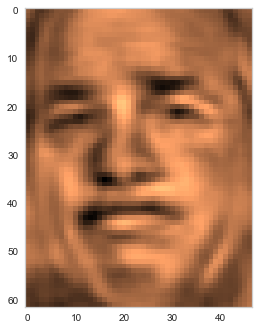

135 components - explained variance: 0.9396217465400696


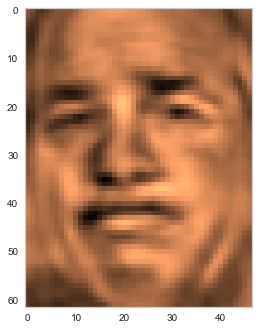

136 components - explained variance: 0.9401194453239441


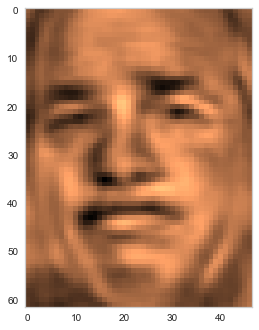

137 components - explained variance: 0.9406131505966187


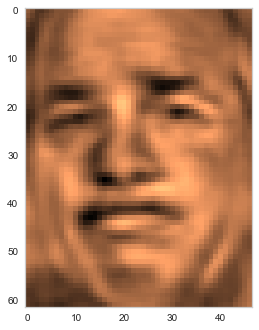

138 components - explained variance: 0.9411002397537231


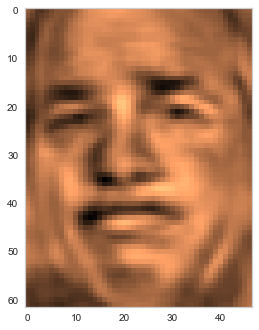

139 components - explained variance: 0.9415839314460754


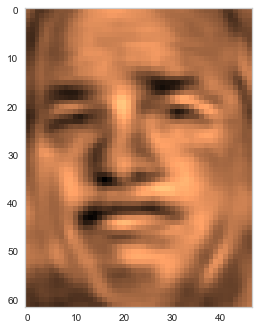

140 components - explained variance: 0.9420629739761353


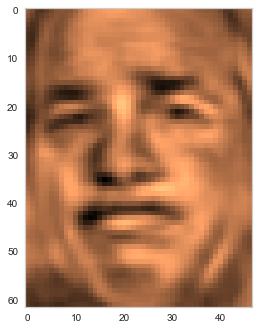

141 components - explained variance: 0.9425293803215027


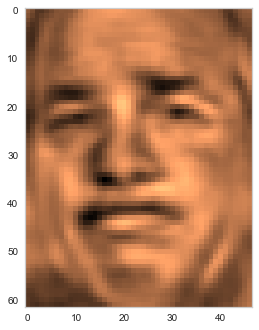

142 components - explained variance: 0.9429919719696045


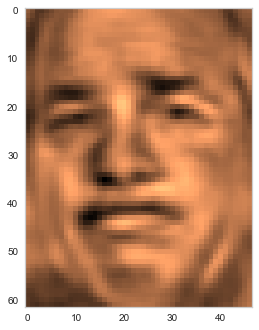

143 components - explained variance: 0.943448543548584


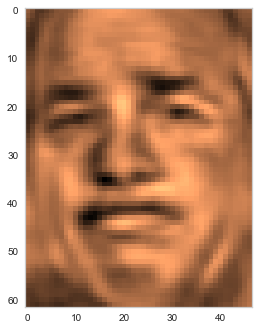

144 components - explained variance: 0.9438979029655457


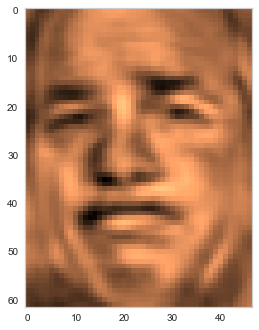

145 components - explained variance: 0.9443442225456238


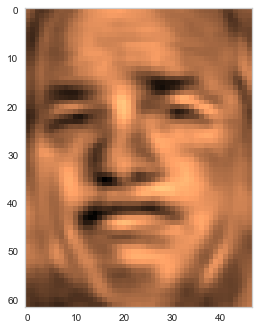

146 components - explained variance: 0.9447806477546692


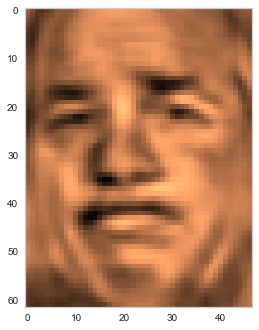

147 components - explained variance: 0.945210874080658


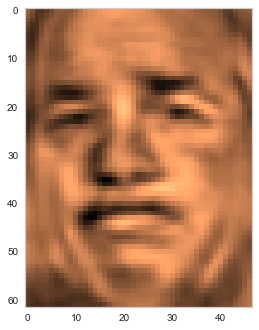

148 components - explained variance: 0.9456359148025513


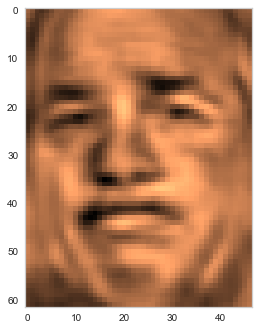

149 components - explained variance: 0.9460570216178894


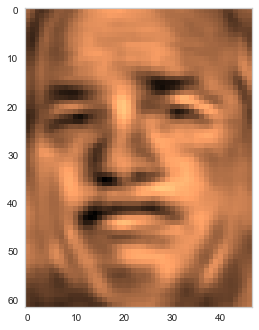

150 components - explained variance: 0.9464637041091919


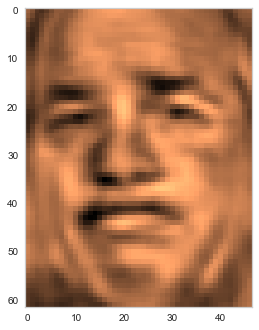

In [141]:
cum = 0

for i in range(len(df_transformed[0])):
    print(f'{i+1} components - explained variance: {pca.explained_variance_ratio_[:i+1].sum()}')
    
    cum += df_transformed[0, i] * pca.components_[i]
    
    plt.imshow(cum.reshape(h,w), cmap='copper')
    plt.grid(False)
    plt.show()

2914

In [ ]:
plt.imshow(pca.inverse_transform(pca.transform(X_std))[0, :].reshape(h,w), cmap='copper')